# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [51]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests as rq
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [52]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
#print(cities)

606

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [53]:
print('Beginning Data Retrieval')     
print('-----------------------------')
cities_weather = []

count = 0
set_count = 1

for city in cities:
    count+=1
    print(f'Processing Record {count} of Set {set_count} | {city}')
    
    if(count == 50):
        count = 0
        set_count+=1
        
    url = "http://api.openweathermap.org/data/2.5/weather?"
    query_url = f"{url}appid={weather_api_key}&units=imperial&q={city}"
    response = rq.get(query_url).json()
    try:
        cities_weather.append({'City':city,
                              'Country':response['sys']['country'],
                              'Lat':response['coord']['lat'],
                              'Lon':response['coord']['lon'],
                              'Temp':response['main']['temp'],
                              'Humidity':response['main']['humidity'],
                              'Wind Speed':response['wind']['speed'],
                               'Cloudiness':response['clouds']['all'],
                               'Date':response['dt']})
    except:
        print('City not found. Skipping...')
        pass

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | salinopolis
Processing Record 2 of Set 1 | college
Processing Record 3 of Set 1 | poitiers
Processing Record 4 of Set 1 | east london
Processing Record 5 of Set 1 | grand-santi
Processing Record 6 of Set 1 | sri aman
Processing Record 7 of Set 1 | atuona
Processing Record 8 of Set 1 | thompson
Processing Record 9 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 10 of Set 1 | torbay
Processing Record 11 of Set 1 | caravelas
Processing Record 12 of Set 1 | beni mazar
Processing Record 13 of Set 1 | punta arenas
Processing Record 14 of Set 1 | braslav
City not found. Skipping...
Processing Record 15 of Set 1 | namatanai
Processing Record 16 of Set 1 | georgetown
Processing Record 17 of Set 1 | new norfolk
Processing Record 18 of Set 1 | ushuaia
Processing Record 19 of Set 1 | kiruna
Processing Record 20 of Set 1 | normandin
Processing Record 21 of Set 1 | cherskiy
Processing Record 22 o

Processing Record 35 of Set 4 | zheleznodorozhnyy
Processing Record 36 of Set 4 | tasiilaq
Processing Record 37 of Set 4 | saskylakh
Processing Record 38 of Set 4 | dawei
Processing Record 39 of Set 4 | bati
Processing Record 40 of Set 4 | padang
Processing Record 41 of Set 4 | pevek
Processing Record 42 of Set 4 | mwinilunga
Processing Record 43 of Set 4 | bendigo
Processing Record 44 of Set 4 | severo-kurilsk
Processing Record 45 of Set 4 | marawi
Processing Record 46 of Set 4 | karratha
Processing Record 47 of Set 4 | kachiry
Processing Record 48 of Set 4 | lakes entrance
Processing Record 49 of Set 4 | isangel
Processing Record 50 of Set 4 | mitu
Processing Record 1 of Set 5 | bosaso
Processing Record 2 of Set 5 | saleaula
City not found. Skipping...
Processing Record 3 of Set 5 | atasu
Processing Record 4 of Set 5 | mahibadhoo
Processing Record 5 of Set 5 | necochea
Processing Record 6 of Set 5 | batsfjord
Processing Record 7 of Set 5 | zhongshan
Processing Record 8 of Set 5 | pan

Processing Record 25 of Set 8 | a
City not found. Skipping...
Processing Record 26 of Set 8 | ikalamavony
Processing Record 27 of Set 8 | sao filipe
Processing Record 28 of Set 8 | andros town
Processing Record 29 of Set 8 | kourou
Processing Record 30 of Set 8 | imbituba
Processing Record 31 of Set 8 | naze
Processing Record 32 of Set 8 | kitimat
Processing Record 33 of Set 8 | mach
Processing Record 34 of Set 8 | umm kaddadah
Processing Record 35 of Set 8 | kahului
Processing Record 36 of Set 8 | guerrero negro
Processing Record 37 of Set 8 | manzanillo
Processing Record 38 of Set 8 | opuwo
Processing Record 39 of Set 8 | krasnoselkup
Processing Record 40 of Set 8 | vestbygda
City not found. Skipping...
Processing Record 41 of Set 8 | kalianget
Processing Record 42 of Set 8 | kalmar
Processing Record 43 of Set 8 | havoysund
Processing Record 44 of Set 8 | sitka
Processing Record 45 of Set 8 | lodja
Processing Record 46 of Set 8 | presidencia roque saenz pena
Processing Record 47 of S

Processing Record 14 of Set 12 | maniitsoq
Processing Record 15 of Set 12 | najran
Processing Record 16 of Set 12 | aykhal
Processing Record 17 of Set 12 | khash
Processing Record 18 of Set 12 | touros
Processing Record 19 of Set 12 | kupino
Processing Record 20 of Set 12 | emba
Processing Record 21 of Set 12 | barreiras
Processing Record 22 of Set 12 | vardo
Processing Record 23 of Set 12 | rio gallegos
Processing Record 24 of Set 12 | tucuman
Processing Record 25 of Set 12 | moen
Processing Record 26 of Set 12 | juegang
Processing Record 27 of Set 12 | rabo de peixe
Processing Record 28 of Set 12 | matara
Processing Record 29 of Set 12 | acutzilapan
City not found. Skipping...
Processing Record 30 of Set 12 | verkhnyaya inta
Processing Record 31 of Set 12 | camacha
Processing Record 32 of Set 12 | verkhniy avzyan
Processing Record 33 of Set 12 | taltal
Processing Record 34 of Set 12 | greven
Processing Record 35 of Set 12 | jaru
Processing Record 36 of Set 12 | lolua
City not found. 

In [54]:
print(query_url)

http://api.openweathermap.org/data/2.5/weather?appid=e719855148ca904602993391debf0af2&units=imperial&q=aksarayskiy


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [76]:
cities_weather_df.to_csv('Cities_Weather.csv')

In [77]:
cities_weather_df = pd.DataFrame(cities_weather)
cities_weather_df

,City,Country,Lat,Lon,Temp,Humidity,Wind Speed,Cloudiness,Date
0,salinopolis,BR,-0.61,-47.36,86.31,54,8.10,48,1595859255
1,college,US,64.86,-147.80,54.57,82,3.36,75,1595859255
2,poitiers,FR,46.58,0.33,85.59,45,16.11,0,1595859255
3,east london,ZA,-33.02,27.91,62.60,67,12.75,2,1595859255
4,grand-santi,GF,4.25,-54.38,87.93,55,3.40,2,1595859255
...,...,...,...,...,...,...,...,...,...
547,urumqi,CN,43.80,87.60,68.00,82,4.47,75,1595859329
548,marzuq,YE,14.40,46.47,82.72,51,9.51,100,1595859329
549,imeni poliny osipenko,RU,52.42,136.49,61.72,86,1.70,6,1595859329
550,honghu,CN,29.82,113.46,73.24,97,3.89,95,1595859330


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [58]:
cities_weather_df.loc[cities_weather_df['Humidity'] > 100] 
                                                

,City,Country,Lat,Lon,Temp,Humidity,Wind Speed,Cloudiness,Date


In [59]:
#  Get the indices of cities that have humidity over 100%.


In [60]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [61]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

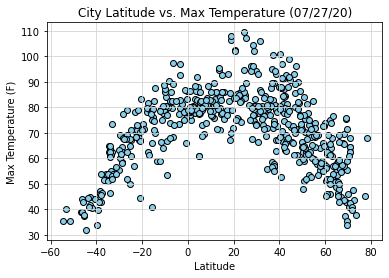

In [62]:
plt.scatter(cities_weather_df["Lat"],cities_weather_df["Temp"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Max Temperature (07/27/20)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("../output_data/latvstemp_plot.png")
plt.show()

## Latitude vs. Humidity Plot

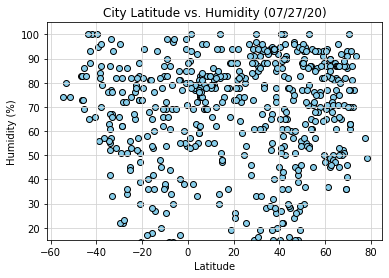

In [63]:
plt.scatter(cities_weather_df["Lat"],cities_weather_df["Humidity"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Humidity (07/27/20)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(15,105)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("../output_data/latvshumid_plot.png")
plt.show()

## Latitude vs. Cloudiness Plot

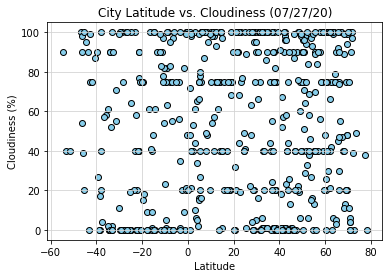

In [64]:
plt.scatter(cities_weather_df["Lat"],cities_weather_df["Cloudiness"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Cloudiness (07/27/20)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("../output_data/cloudiness_plot.png")
plt.show()

## Latitude vs. Wind Speed Plot

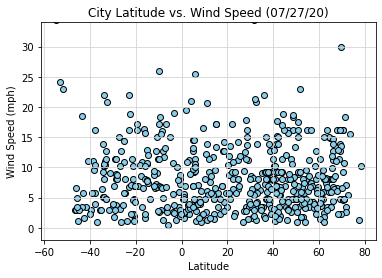

In [65]:
plt.scatter(cities_weather_df["Lat"],cities_weather_df["Wind Speed"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Wind Speed (07/27/20)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.ylim(-2,34)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("../output_data/windspeed_plot.png")
plt.show()

## Linear Regression

In [66]:
# OPTIONAL: Create a function to create Linear Regression plots

In [67]:
# Create Northern and Southern Hemisphere DataFrames
Northern_hem_df = cities_weather_df.loc[cities_weather_df['Lat'] > 0]
Southern_hem_df = cities_weather_df.loc[cities_weather_df['Lat'] < 0]




####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

R squared: 0.3996653528750232


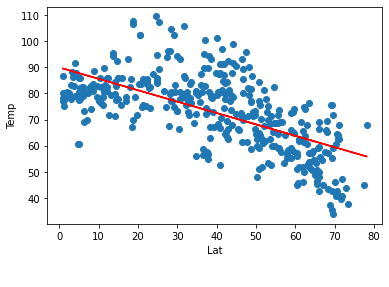

In [68]:
x_values = Northern_hem_df['Lat'].astype('float')
y_values = Northern_hem_df['Temp'].astype('float')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)

#Line map
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Lat')
plt.ylabel('Temp')
print(f"R squared: {rvalue**2}")
plt.savefig("../output_data/latvstemp_regress.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

R squared: 0.7027907519993518


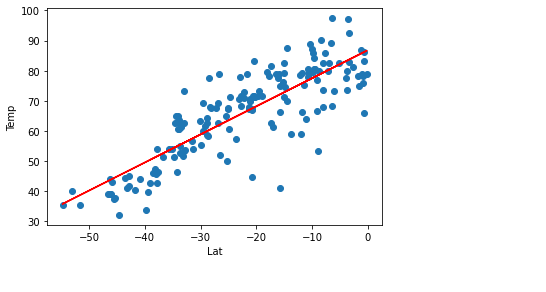

In [69]:
x_values = Southern_hem_df['Lat'].astype('float')
y_values = Southern_hem_df['Temp'].astype('float')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)

#Line map
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Lat')
plt.ylabel('Temp')
print(f"R squared: {rvalue**2}")
plt.savefig("../output_data/latvstemp_regress2.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R squared: 0.00023993665245664047


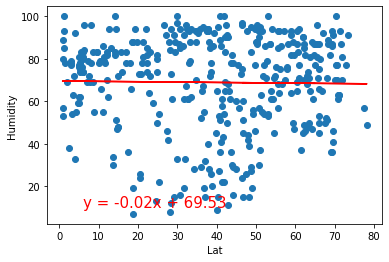

In [70]:
x_values = Northern_hem_df['Lat'].astype('float')
y_values = Northern_hem_df['Humidity'].astype('float')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)

#Line map
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Lat')
plt.ylabel('Humidity')
print(f"R squared: {rvalue**2}")
plt.savefig("../output_data/latvshumid_regress.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R squared: 0.029004423338161427


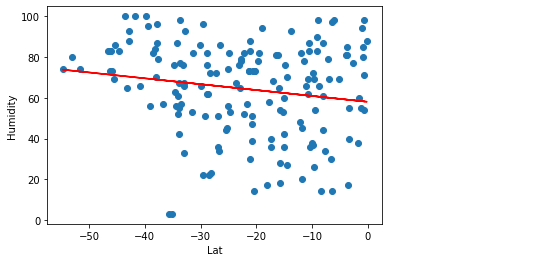

In [71]:
x_values = Southern_hem_df['Lat'].astype('float')
y_values = Southern_hem_df['Humidity'].astype('float')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)

#Line map
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Lat')
plt.ylabel('Humidity')
print(f"R squared: {rvalue**2}")
plt.savefig("../output_data/latvshumid_regress2.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R squared: 0.0033188611835097536


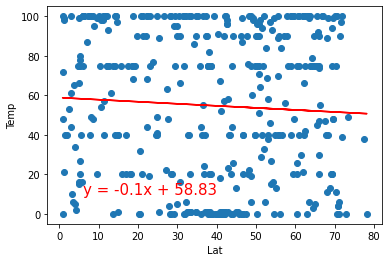

In [72]:
x_values = Northern_hem_df['Lat'].astype('float')
y_values = Northern_hem_df['Cloudiness'].astype('float')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)

#Line map
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Lat')
plt.ylabel('Temp')
print(f"R squared: {rvalue**2}")
plt.savefig("../output_data/latvscloudiness_regress.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R squared: 0.00029490755642743393


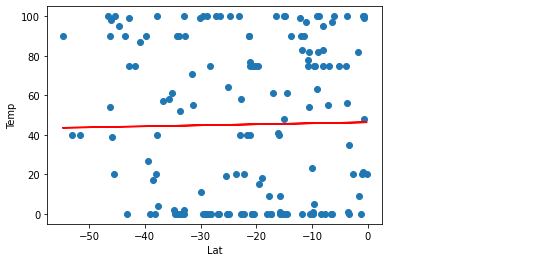

In [73]:
x_values = Southern_hem_df['Lat'].astype('float')
y_values = Southern_hem_df['Cloudiness'].astype('float')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)

#Line map
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Lat')
plt.ylabel('Temp')
print(f"R squared: {rvalue**2}")
plt.savefig("../output_data/latvscloudiness_regress2.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R squared: 0.003426501122040078


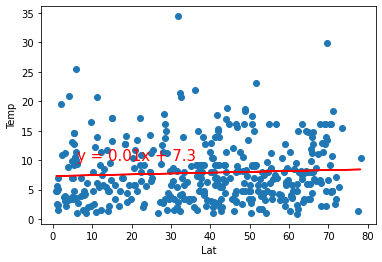

In [74]:
x_values = Northern_hem_df['Lat'].astype('float')
y_values = Northern_hem_df['Wind Speed'].astype('float')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)

#Line map
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Lat')
plt.ylabel('Temp')
print(f"R squared: {rvalue**2}")
plt.savefig("../output_data/latvswind_regress.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R squared: 0.0037701756125226274


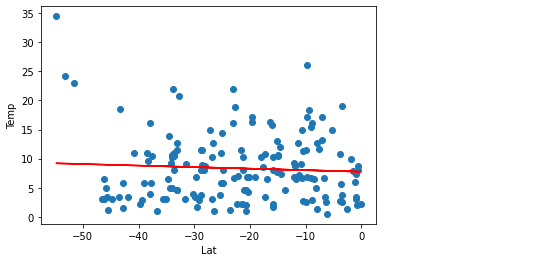

In [75]:
x_values = Southern_hem_df['Lat'].astype('float')
y_values = Southern_hem_df['Wind Speed'].astype('float')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)

#Line map
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Lat')
plt.ylabel('Temp')
print(f"R squared: {rvalue**2}")
plt.savefig("../output_data/latvswind_regress2.png")
plt.show()